## Data Visualization using Python

### Pie Charts, Box Plots, Scatter Plots, and Bubble Plots

#### importing all required module

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Fetching data file

In [2]:
#checking all available files in current directory
%ls

Canada.xlsx  lineChart.ipynb  PieChart_BoxPlot_ScatterPlot_BubblePlot.ipynb


In [3]:
#path of data file
path = 'Canada.xlsx'

#using read_excel function to read data file
df = pd.read_excel(
    path,
    sheet_name='Canada by Citizenship',
    skiprows= range(20),
    skipfooter=2
)

print("Data has been successfully read!!")

Data has been successfully read!!


In [4]:
#viewing our data frame
#top 5 rows
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
#last 5 rows
df.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


#### Cleaning the data

In [6]:
#dropping unnecessary coulmns
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [7]:
#changing the name of columns 
df.rename(columns={
    'OdName' : 'Country' ,
    'AreaName' : 'Continent' ,
    'RegName' : 'Region'
}, inplace=True)

In [8]:
#checking new columns
df.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

##### Adding a Total column that has total immigrants over entire period (1980-2013)

In [9]:
df['Total'] = df.sum(axis=1)

/tmp/ipykernel_47527/2759960331.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total'] = df.sum(axis=1)


In [10]:
df.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699


In [11]:
#checking if there are any null values
df.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [12]:
#summaryt of each column 
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


#### Pie Charts

##### Gathereing data

In [14]:
#grouping countries by continent
df_continent = df.groupby('Continent', axis=0).sum()

#note: the output of groupby is a 'groupby' object and we cannot use it without applying a function (sun() is used here)
#verifying the output of groupby
print(type(df.groupby('Continent', axis=0)))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [15]:
#displaying new data set
df_continent.head(4)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148


##### Ploting the data

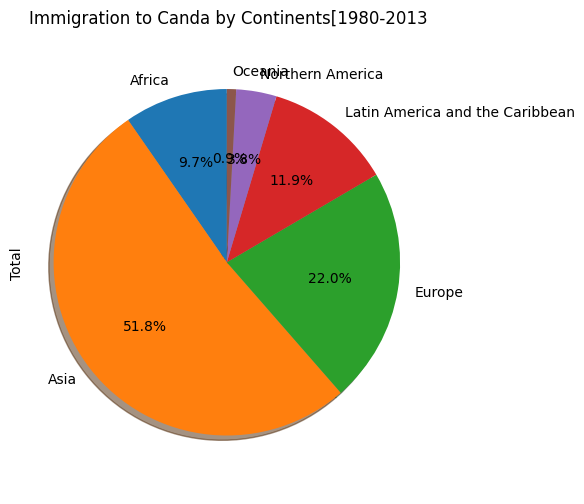

In [18]:
#creating pie chart
df_continent['Total'].plot(
    kind= 'pie',
    figsize=(5,6),
    autopct= '%1.1f%%',
    startangle=90,
    shadow=True
)

plt.title('Immigration to Canda by Continents[1980-2013')
plt.axis('equal') #set pie chart to look like a circle
plt.show()

#note
#1. autopct - creates % 
# startangle - represent starting point

Figure is unclear and text are overlapping

##### Improving visuals of pie chart

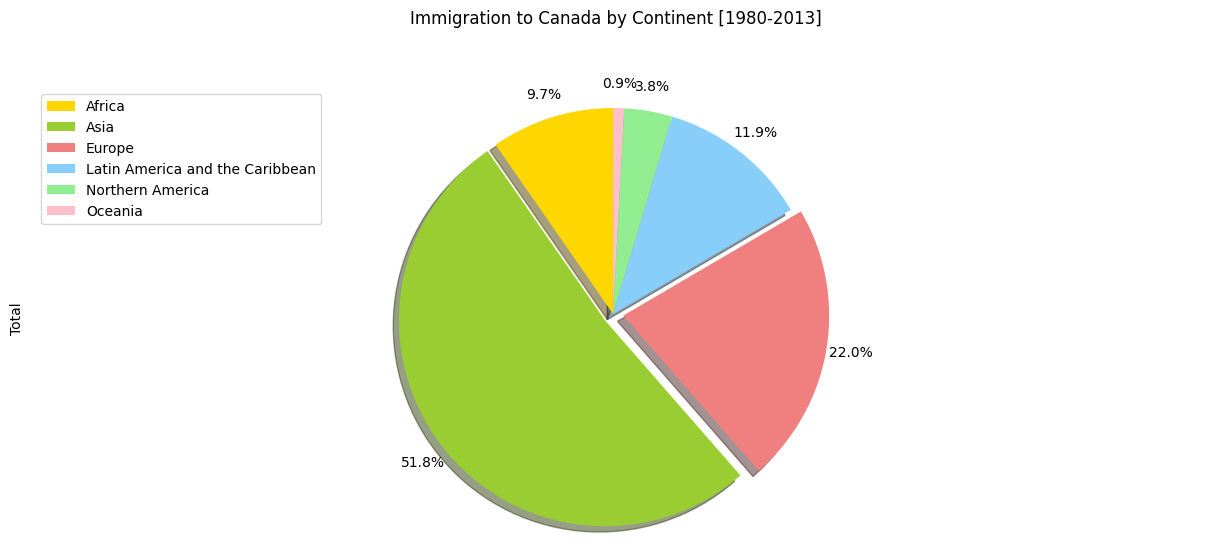

In [20]:
from cProfile import label


colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explodes_list = [0, 0.05, 0.05, 0, 0, 0] #ration for each continent with which to offset each wedge

df_continent['Total'].plot(
    kind= 'pie',
    figsize= (15, 6),
    autopct='%1.1f%%',
    startangle=90,
    labels = None, #turn of labels(to avoids overlapping)
    shadow = True,
    pctdistance = 1.12, #the ration between the center of each pie slices and the start of text generated by autopct
    colors = colors_list, #adding custom colors
    explode = explodes_list # explodes highest 
)

#scale title by 12% 
plt.title('Immigration to Canada by Continent [1980-2013]', y=1.12)

plt.axis('equal')

#adding legend
plt.legend(labels=df_continent.index, loc='upper left')

plt.show()

``` Explore proportion of new immigrants grouped by continent in the year 2013 ```

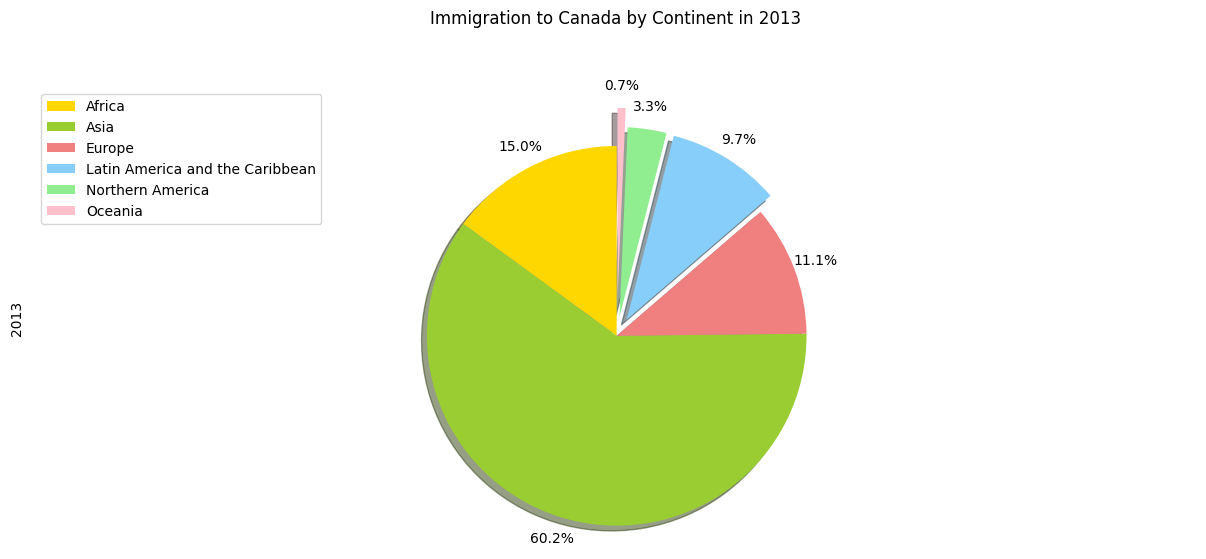

In [22]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explodes_list = [0, 0, 0, 0.1, 0.1, 0.2] #ration for each continent with which to offset each wedge

df_continent[2013].plot(
    kind= 'pie',
    figsize= (15, 6),
    autopct='%1.1f%%',
    startangle=90,
    labels = None, #turn of labels(to avoids overlapping)
    shadow = True,
    pctdistance = 1.12, #the ration between the center of each pie slices and the start of text generated by autopct
    colors = colors_list, #adding custom colors
    explode = explodes_list # explodes lowest 3
)

#scale title by 12% 
plt.title('Immigration to Canada by Continent in 2013', y=1.12)

plt.axis('equal')

#adding legend
plt.legend(labels=df_continent.index, loc='upper left')

plt.show()

#### Box plots

In [34]:
#viewing out data frame
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [35]:
#settijng index to countries
df.set_index('Country', inplace=True)
df.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [38]:
#creating a list of countries
years = list(range(1980, 2014))

``` Box ploting data of immigrants of Japan between 1980 to 2013 ```

In [40]:
#getting data for Japan 
df_Japan = df.loc[['Japan'], years].transpose()
df_Japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


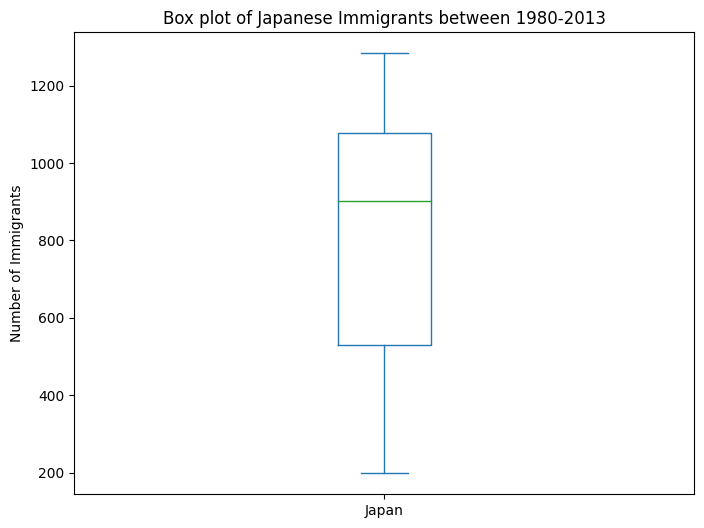

In [41]:
#box ploting for Japan
df_Japan.plot(
    kind= 'box',
    figsize=(8,6)
)

plt.title('Box plot of Japanese Immigrants between 1980-2013')
plt.ylabel('Number of Immigrants')
plt.show()

In [42]:
#matching it with actual numbers
df_Japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


``` Compare the distribution of numbers of new immigrants from India and China for period 1980 - 2013 ```

In [43]:
#getting data for India and China
df_IndChi = df.loc[['India', 'China'], years].transpose()
df_IndChi.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


In [44]:
#checking detail of data of India and China
df_IndChi.describe()

Country,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


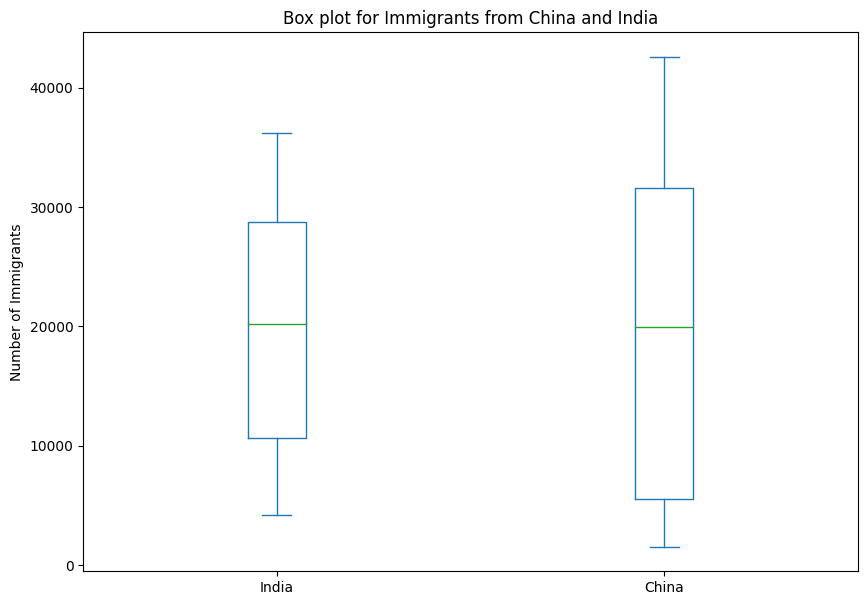

In [45]:
#ploting data for India and China
df_IndChi.plot(
    kind='box',
    figsize=(10,7)
)

plt.title('Box plot for Immigrants from China and India')
plt.ylabel('Number of Immigrants')

plt.show()

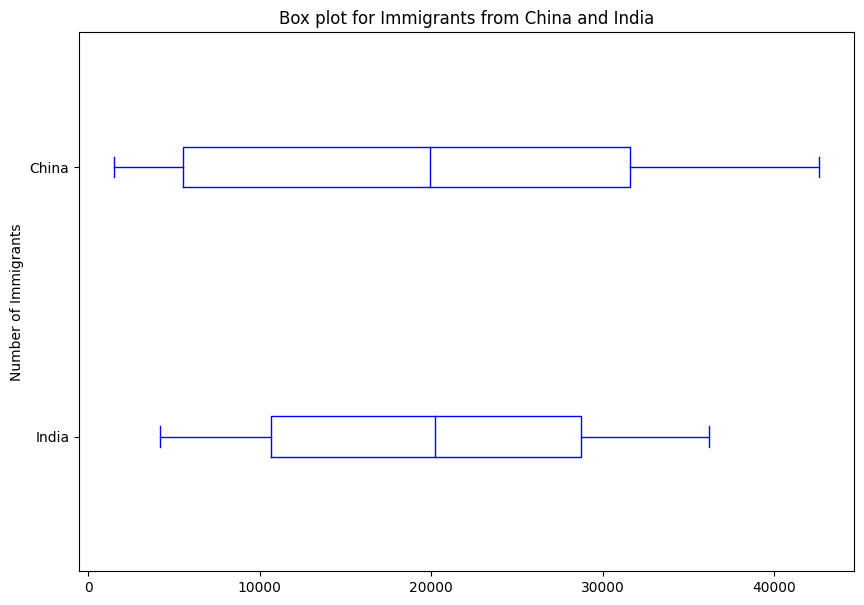

In [46]:
#horizontal box plots 
#ploting data for India and China
from turtle import color


df_IndChi.plot(
    kind='box',
    figsize=(10,7),
    color='blue',
    vert=False
)

plt.title('Box plot for Immigrants from China and India')
plt.ylabel('Number of Immigrants')

plt.show()

##### Sub plots

Used to plot multiple plot within same figure.
Syntax:
```python
    fig = plt.figure() #creates figure
    ax = fig.add_subplot(nrows, ncols, plot_number) #creates subplots
```

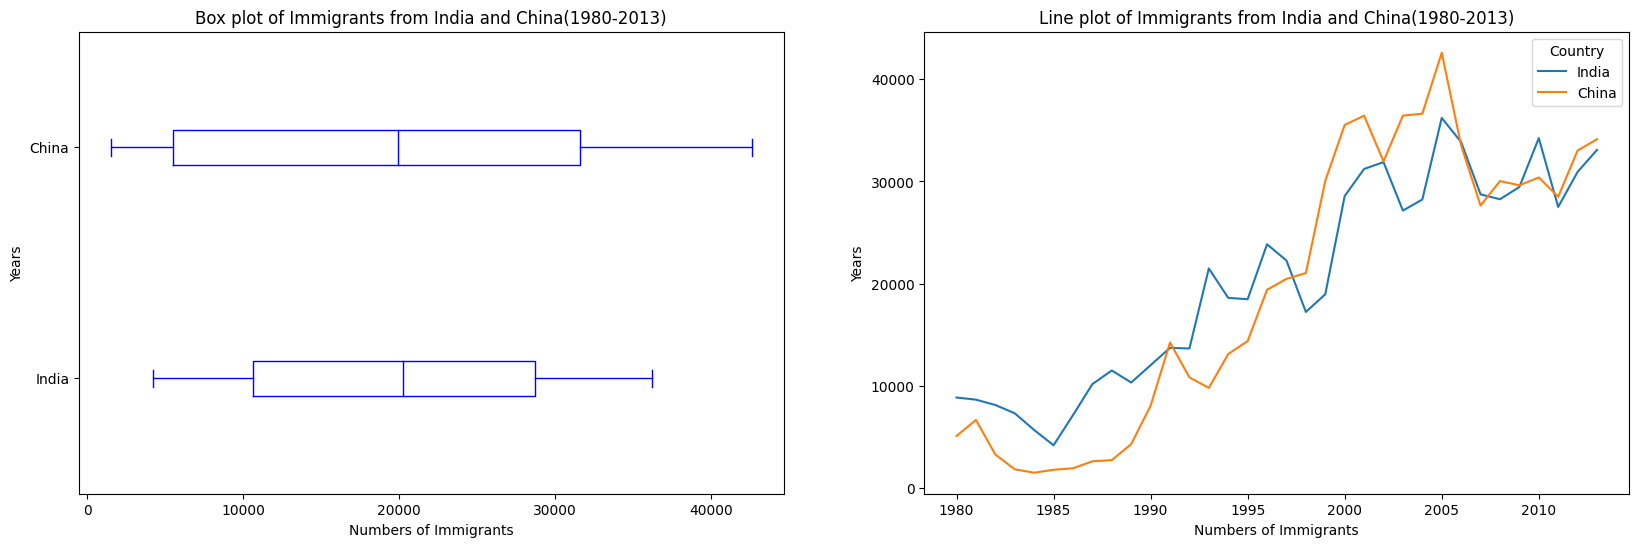

In [49]:
#creating a subplot
fig = plt.figure() 
ax0 = fig.add_subplot(1, 2, 1) #add subplot 1(1 row. 2 column, first plot)
ax1 = fig.add_subplot(1, 2, 2) #add subplot 2(1 row, 2 column, second plot)

#subplot 1: box plot
df_IndChi.plot(
    kind='box',
    color='blue',
    vert= False,
    figsize=(20, 6),
    ax=ax0
)

ax0.set_title('Box plot of Immigrants from India and China(1980-2013)')
ax0.set_xlabel('Numbers of Immigrants')
ax0.set_ylabel('Years')


#subplots 2: line plot
df_IndChi.plot(
    kind='line',
    figsize=(20,6),
    ax=ax1
)

ax1.set_title('Line plot of Immigrants from India and China(1980-2013)')
ax1.set_xlabel('Numbers of Immigrants')
ax1.set_ylabel('Years')

plt.show()

``` Box plot to visualize distribution of top 15 countries (based on total immigration) group by decades 1980s, 1990s and 2000s. ```

In [58]:
#getting the data set of top 15 countries
df_top15 = df.sort_values(['Total'], ascending=False, axis=0).head(15)

In [59]:
#display the new data frame
df_top15.head(15)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [60]:
#creating list of years for each decade
dec_80s = list(range(1980, 1990))
dec_90s = list(range(1990, 2000))
dec_00s = list(range(2000, 2010))

In [61]:
#creating data frame for each decade
df_80s = df_top15.loc[:, dec_80s].sum(axis=1)
df_90s = df_top15.loc[:, dec_90s].sum(axis=1)
df_00s = df_top15.loc[:, dec_00s].sum(axis=1)

In [62]:
#viewing data frame 
df_80s.head()

Country
India                                                    82154
China                                                    32003
United Kingdom of Great Britain and Northern Ireland    179171
Philippines                                              60764
Pakistan                                                 10591
dtype: int64

In [63]:
#merging the 80, 90s, and 00s data frame to create a new data frame
new_df = pd.DataFrame({'1980s':df_80s, '1990s':df_90s, '2000s':df_00s})

#viewing new dataframe
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [64]:
#viewing statistic summary of new dataframe
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


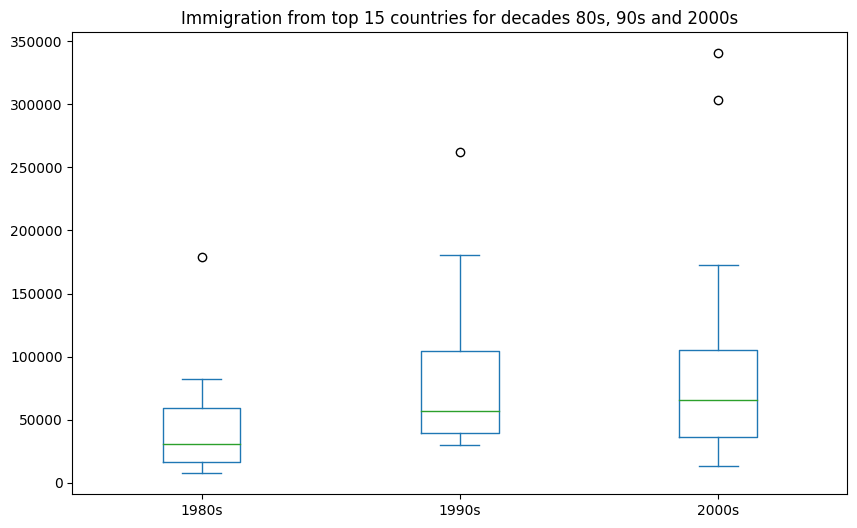

In [65]:
#box plotting for new data frame
new_df.plot(
    kind='box',
    figsize=(10,6)
)

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

#### Scatter plot

``` Visualize trend of total immigration to Canada (all countries combined) for the years 1980-2013 ```

In [67]:
#getting the data frame
df_total = pd.DataFrame(df[years].sum(axis=0))
df_total.head(5)

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [68]:
df_total.index

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
      dtype='object')

In [69]:
#changing years to int
df_total.index = map(int, df_total.index)

In [70]:
df_total.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')

In [72]:
#resetting index 
df_total.reset_index(inplace=True)
#renaming column
df_total.columns = ['year', 'total']
df_total.head(5)

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


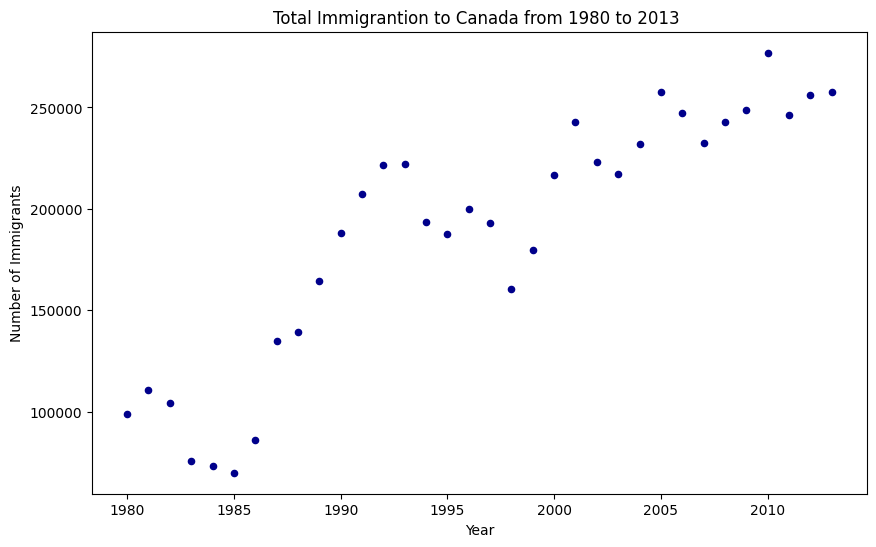

In [73]:
#scatter plotting the data
df_total.plot(
    kind='scatter',
    x='year',
    y='total',
    figsize=(10,6),
    color='darkblue'
)

plt.title('Total Immigrantion to Canada from 1980 to 2013 ')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

``` Plot a linear line of best fit to predict number of Immigrants in 2015 ```

In [75]:
#getting equation of best fit
x=df_total['year']
y=df_total['total']

fit = np.polyfit(x,y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

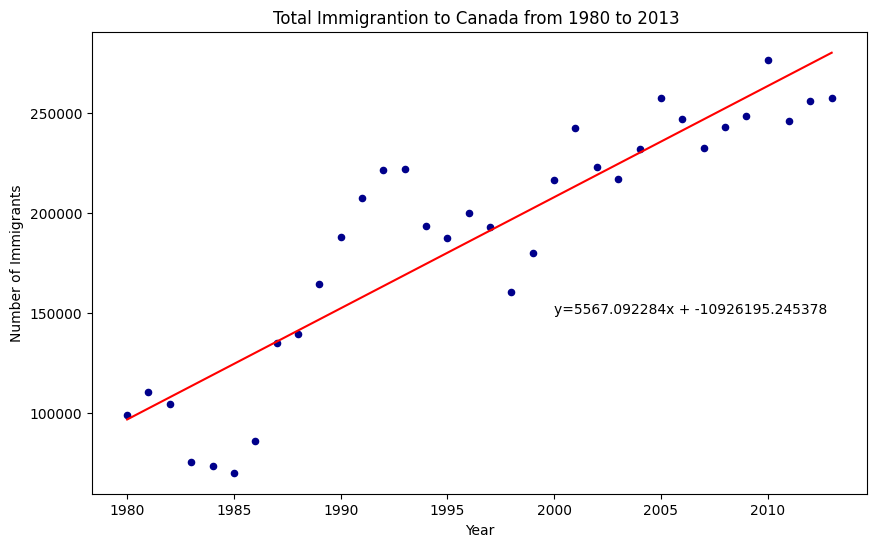

'No Immigrants =5567.092284 * Years + -10926195.245378'

In [76]:
#plotting the regression line in scatter plot
#scatter plotting the data
df_total.plot(
    kind='scatter',
    x='year',
    y='total',
    figsize=(10,6),
    color='darkblue'
)

plt.title('Total Immigrantion to Canada from 1980 to 2013 ')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

#plot the line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red',)
plt.annotate('y={0:0f}x + {1:0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

#print out the line of best fit
'No Immigrants ={0:0f} * Years + {1:0f}'.format(fit[0], fit[1])

immigrants in 2015 will be (5567 * 2015 - 10926195) = 291, 310

```Create a scatter plot of the total immigration from Denmark, Norway and Sweden to Canada from 1980 to 2013 ```

In [80]:
#creating data frame for Denamrk, Norway and Sweden
df_DNS = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

In [81]:
#view data frame
df_DNS.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [82]:
df_DNS = pd.DataFrame(df_DNS.sum(axis=1))

In [84]:
df_DNS

,0
1980,669
1981,678
1982,627
1983,333
1984,252
1985,285
1986,336
1987,387
1988,373
1989,387


In [85]:
# resetting the index
df_DNS.reset_index(inplace=True)

In [86]:
# changing column names
df_DNS.columns= ['year', 'total']

In [87]:
# Viewing new column names
df_DNS.columns

Index(['year', 'total'], dtype='object')

In [91]:
#viewing new data frame
df_DNS.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


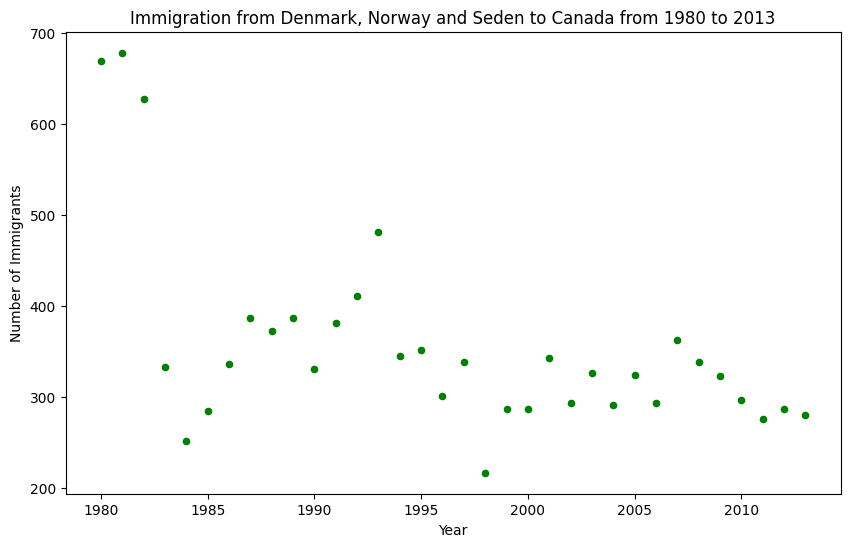

In [92]:
#creating the scatter plot
df_DNS.plot(
    kind='scatter',
    x = 'year',
    y= 'total',
    figsize= (10,6),
    color = 'green'
)

plt.title('Immigration from Denmark, Norway and Seden to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

#### Bubble Plot

Bubble plot is a variation of scatter plot which display three dimensions of data (x, y and z). </br>
The points are replaced by buuble and size of bubble is determined by value z, known as weight.

``` Compare immigration of Argentina to Brazil due to the effect of Argentina's great depression```

In [93]:
#transposing the dataframe
df_transpose = df[years].transpose()

df_transpose.index.name = 'Year'
df_transpose.reset_index(inplace=True)

In [94]:
#viwing the changes in data frame
df_transpose.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [95]:
#creating a normalized weight by using formula:
# x' = (X-Xin / Xmax - Xmin)

In [96]:
#normalize brazil data
norm_brazil= (df_transpose['Brazil'] - df_transpose['Brazil'].min()) / (df_transpose['Brazil'].max() - df_transpose['Brazil'].min())

#normalize argentina data
norm_argentina= (df_transpose['Argentina'] - df_transpose['Argentina'].min()) / (df_transpose['Argentina'].max() - df_transpose['Argentina'].min())

we can pass wieght using 's' parameter. </br>
As weights are between 0 and 1, they wont be visible in plot. </br>
1. So, multiply wieght by 2000 to scale it up on graph
2. Add 10 to compensate min value (which has 0 wight)

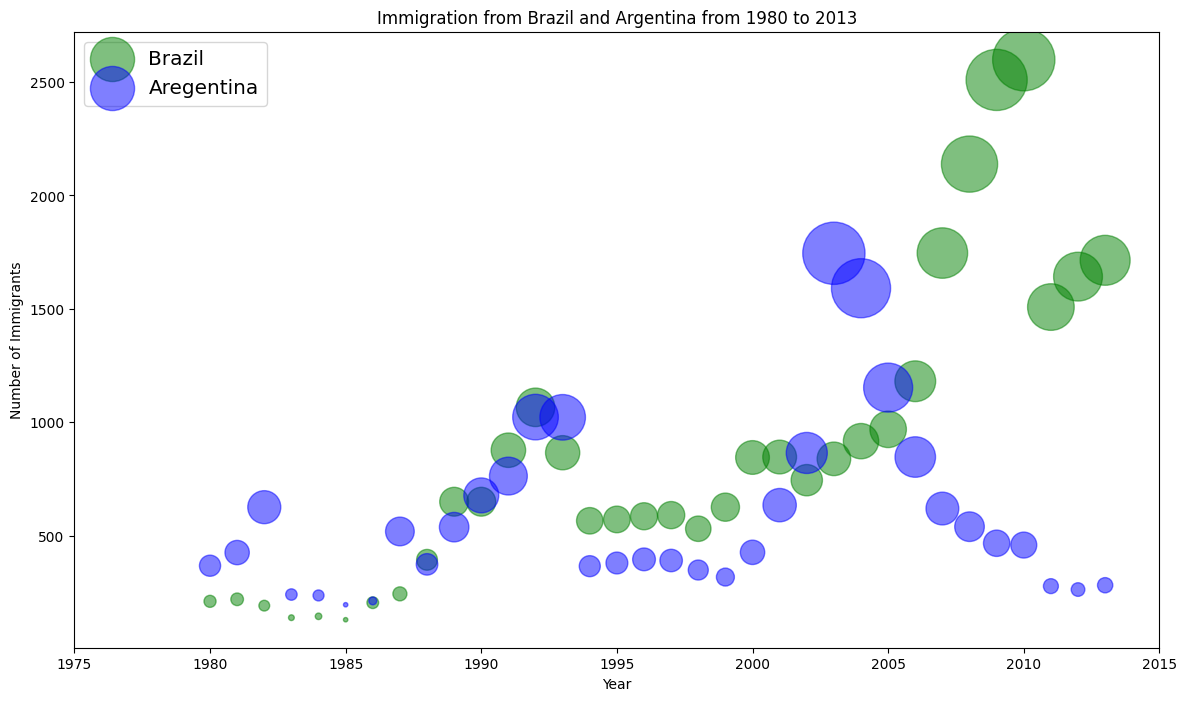

In [97]:
#ploting the data
# To plot two different plots in one plot, we includes the axes one plot into the other by passinf it via the 'ax' parameter

#Brazil
ax0 = df_transpose.plot(
    kind= 'scatter',
    x= 'Year',
    y= 'Brazil',
    figsize= (14, 8),
    alpha=0.5, #transparency
    color= 'green',
    s = norm_brazil * 2000 + 10, #pass the weight
    xlim = (1975, 2015)
)

#Argentina

ax1 = df_transpose.plot(
    kind= 'scatter',
    x= 'Year',
    y= 'Argentina',
    figsize= (14, 8),
    alpha=0.5, #transparency
    color= 'blue',
    s = norm_argentina * 2000 + 10, #pass the weight
    ax= ax0 
)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Aregentina'], loc='upper left', fontsize='x-large')

We can see increase in immigration from Argentina in year 1998 to 2002, It also suffered during 1974 to 1990. </br>
We can also observe Brazil suffered currency drop by 35% in 1999, which led to immigration. The economy slowly recovered over the years.

```Comparing Immigration of India and China using Bubble plot```

In [99]:
#creating normalize data

#normalize china data
norm_china = (df_transpose['China'] - df_transpose['China'].min()) / (df_transpose['China'].max() - df_transpose['China'].min())

#normalize India data
norm_India = (df_transpose['India'] - df_transpose['India'].min()) / (df_transpose['India'].max() - df_transpose['India'].min())

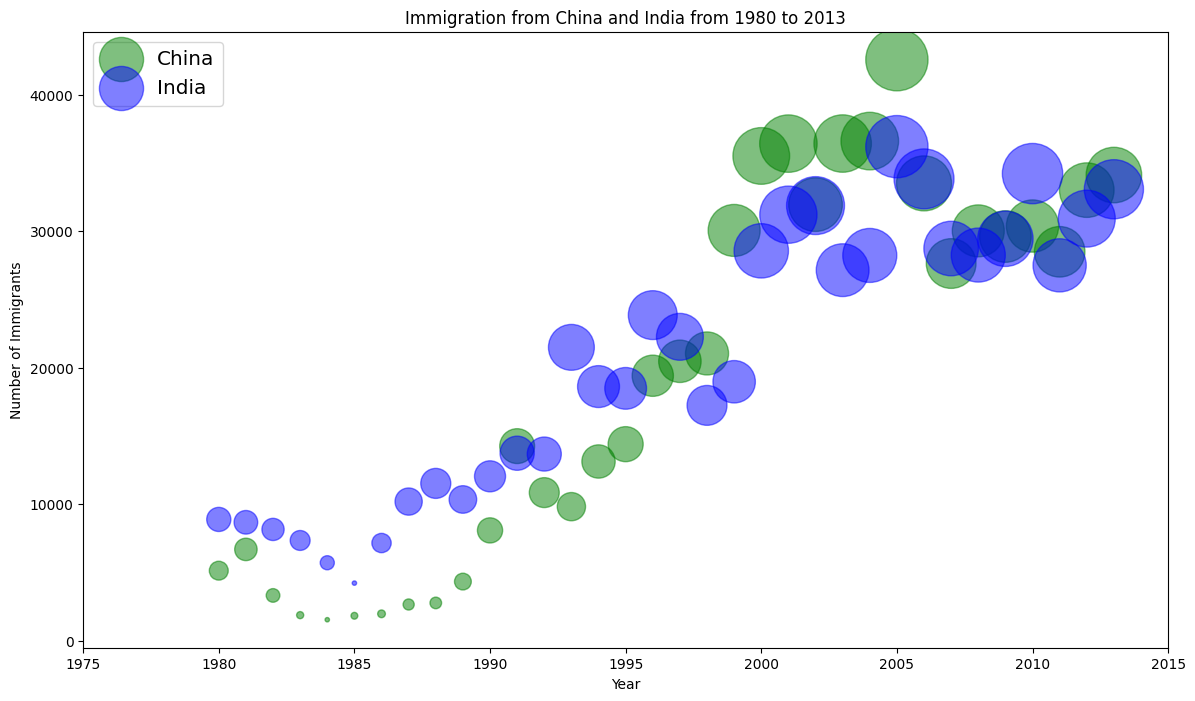

In [100]:
#generating bubble plot

#China
ax0 = df_transpose.plot(
    kind= 'scatter',
    x= 'Year',
    y= 'China',
    figsize= (14, 8),
    alpha=0.5, #transparency
    color= 'green',
    s = norm_china * 2000 + 10, #pass the weight
    xlim = (1975, 2015)
)

#India
ax1 = df_transpose.plot(
    kind= 'scatter',
    x= 'Year',
    y= 'India',
    figsize= (14, 8),
    alpha=0.5, #transparency
    color= 'blue',
    s = norm_India * 2000 + 10, #pass the weight
    ax= ax0 
)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 to 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')